# Consumer Reviews Summarization - Project Part 1 


[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/Ariamestra/ConsumerReviews/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ariamestra/ConsumerReviews/blob/main/project_part1.ipynb)


## 1. Introduction
**Project Explanation** <br>
My goal for this project is to create a model that summarizes reviews which will enable customers to quickly skim through reviews when evaluating a product. This system will condense the content of a review and its associated rating into a single-line comment, categorized as positive, neutral, or negative based on the rating given.<br>

**Data** <br>
The dataset was sourced from Kaggle, specifically the [Consumer Review of Clothing Product](https://www.kaggle.com/datasets/jocelyndumlao/consumer-review-of-clothing-product)
 dataset. This dataset includes customer reviews from Amazon. It has all sorts of feedback from buyers about different products. Along with the customers' actual reviews, ratings, product type, material, construction, color, finish, and durability.<br>



## Data Exploration
Now lets start doing exploration on the entire dataset.<br>

In [1]:
# import all of the python modules/packages you'll need here
#!pip3 install nltk
#nltk.download('stopwords')
#nltk.download('punkt')

import pandas as pd
from collections import Counter
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import string

data_URL = 'https://raw.githubusercontent.com/Ariamestra/ConsumerReviews/main/Reviews.csv'
df = pd.read_csv(data_URL)
print(f"Shape: {df.shape}")
df.head()

Shape: (49338, 9)


,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0


In [2]:
# Print the column names
print(f"Columns: {df.columns}")

Columns: Index(['Title', 'Review', 'Cons_rating', 'Cloth_class', 'Materials',
       'Construction', 'Color', 'Finishing', 'Durability'],
      dtype='object')


In [3]:
# Get summary of the DataFrame
print(f"Info: {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49338 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         45370 non-null  object 
 1   Review        48507 non-null  object 
 2   Cons_rating   49124 non-null  float64
 3   Cloth_class   49322 non-null  object 
 4   Materials     5741 non-null   float64
 5   Construction  5743 non-null   float64
 6   Color         5742 non-null   float64
 7   Finishing     5737 non-null   float64
 8   Durability    5734 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB
Info: None


In [4]:
# Check for the number of missing values in each column
print("Find all of the nulls:")
print(df.isnull().sum())


Find all of the nulls:
Title            3968
Review            831
Cons_rating       214
Cloth_class        16
Materials       43597
Construction    43595
Color           43596
Finishing       43601
Durability      43604
dtype: int64


In [5]:
# Check for the number of missing values in each column
print(f"Missing values in each column: {df.duplicated().sum()}")

Missing values in each column: 1118


In [6]:
# Count the number of nulls in reviews
number_of_nulls = df['Review'].isnull().sum()
print(f"Number of nulls in the review column: {number_of_nulls}")

# Calculate the number of nulls in rating
number_of_nulls_in_ratings = df['Cons_rating'].isnull().sum()
print(f"Number of nulls in the rating column: {number_of_nulls_in_ratings}")

original_count = df.shape[0]
df_cleaned = df.dropna(subset=['Review', 'Cons_rating']) # Drop rows with nulls in reviews and ratings columns
cleaned_count = df_cleaned.shape[0] # Number of rows after dropping nulls
rows_dropped = original_count - cleaned_count

print(f"Number of rows dropped: {rows_dropped}")

Number of nulls in the review column: 831
Number of nulls in the rating column: 214
Number of rows dropped: 1043


In [7]:
# Get the shape after dropping null values
df_shape_after_dropping = df_cleaned.shape

print(f"Shape of the DataFrame after dropping rows: {df_shape_after_dropping}")

Shape of the DataFrame after dropping rows: (48295, 9)


## Let's do more exploration in the ratings

In [8]:
# Get the statistical summary of ratings
print("Describe the ratings:")
print(df['Cons_rating'].describe())

Describe the ratings:
count    49124.000000
mean         4.099463
std          1.283707
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Cons_rating, dtype: float64


In [9]:
# Occurrence of each rating
print("\nCount of individual ratings:")
print(df['Cons_rating'].value_counts())


Count of individual ratings:
Cons_rating
5.0    28359
4.0     8267
3.0     5350
1.0     3827
2.0     3321
Name: count, dtype: int64


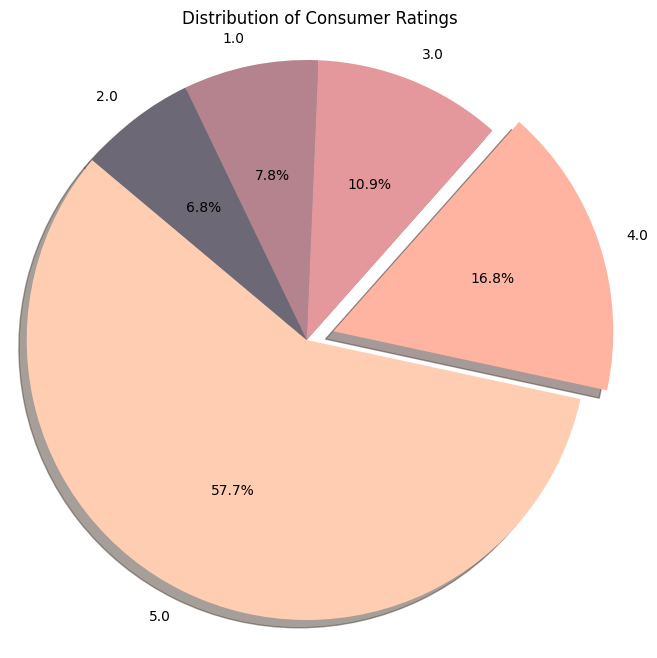

In [10]:
# Pie chart - occurrence of each rating
ratings_counts = df['Cons_rating'].value_counts()

# Create a pie chart 
labels = ratings_counts.index
sizes = ratings_counts.values
colors = ['#FFCDB2', '#FFB4A2', '#E5989B', '#B5838D', '#6D6875'] 
explode = [0] * len(labels) # Fixes error
if 4 in labels:  # Fixes error
    explode[labels.tolist().index(4)] = 0.1

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Makes pie chart a circle
plt.title('Distribution of Consumer Ratings')
plt.show()

## Let's do more exploration in the reviews

In [11]:
# Calculate the length 
df['Review_length'] = df['Review'].astype(str).apply(len)

# Calculate the average 
average_length = df['Review_length'].mean()
print(f"Average review length: {average_length}")

# Calculate the median 
median_length = df['Review_length'].median()
print(f"Median review length: {median_length}")

# Find the longest review
longest_review_row = df.loc[df['Review_length'].idxmax()]
longest_review = longest_review_row['Review']
longest_review_length = longest_review_row['Review_length']

print(f"Longest review length: {longest_review_length}")

# Find the shortest review
shortest_review_row = df[df['Review_length'] > 0].loc[df['Review_length'].idxmin()]
shortest_review = shortest_review_row['Review']
shortest_review_length = shortest_review_row['Review_length']

print(f"Shortest review length: {shortest_review_length}")

Average review length: 215.77198102882159
Median review length: 172.0
Longest review length: 3510
Shortest review length: 1


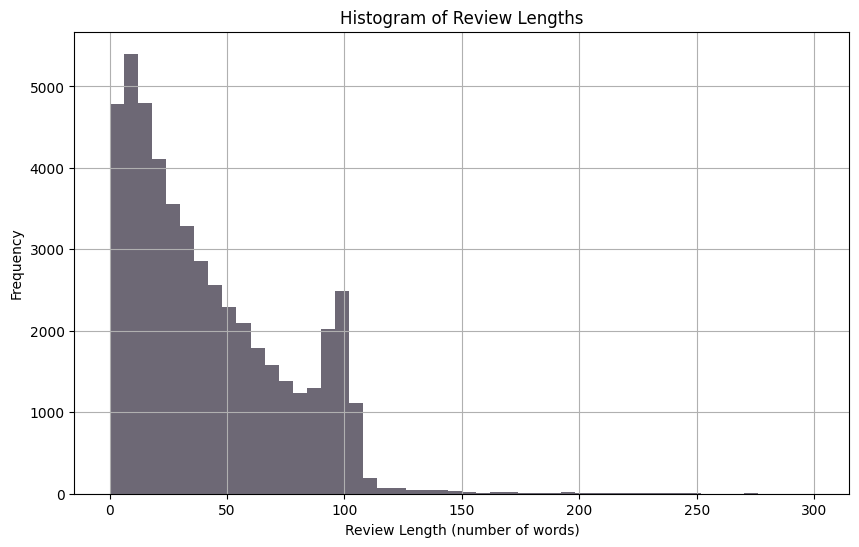

In [12]:
# Calculate the length of each review 
df['review_length'] = df['Review'].apply(lambda x: len(str(x).split()))  # Conversion to string 

# Plot the histogram 
plt.figure(figsize=(10, 6))
df['review_length'].hist(bins=50, range=(0, 300), color='#6D6875')
plt.title('Histogram of Review Lengths')
plt.xlabel('Review Length (number of words)')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Most common Words

stopwords.fileids()  # This line will force NLTK to load the stopwords
stop_words = set(stopwords.words('english')) # English Stop Words

all_reviews = ' '.join(df['Review'].astype(str)) # Combine all reviews into one large string

# Tokenize 
words = all_reviews.split()
words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]

word_counts = Counter(words) # Count word frequencies

most_common_words = word_counts.most_common(20) # Get the most common words

print("Most common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most common Words:
fit: 10963
like: 10928
size: 10323
love: 9418
dress: 9327
wear: 8551
would: 7020
great: 6805
top: 5727
ordered: 5655
little: 5489
really: 5274
i'm: 5051
fabric: 4877
look: 4833
color: 4724
one: 4652
bought: 4561
it.: 4432
fits: 4393


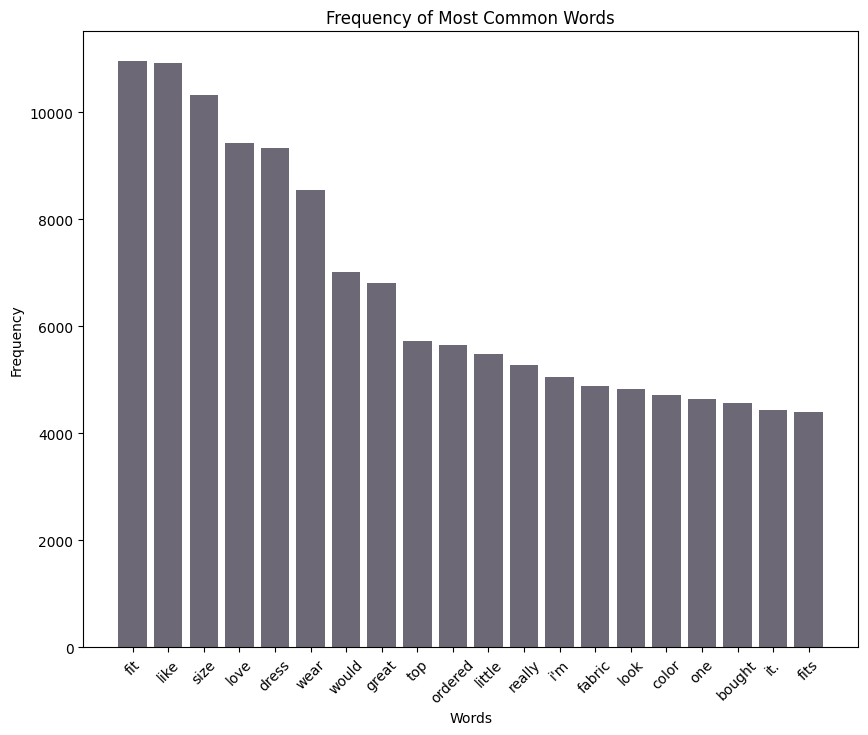

In [14]:
words, counts = zip(*most_common_words) # Fixes error

# Creating the histogram
plt.figure(figsize=(10, 8))
plt.bar(words, counts, color='#6D6875')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Most Common Words')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

## 3. Conclusion

My strategy for developing an effective model is exploration and evaluation of various machine learning, and deep learning approaches. The initial step will involve making a baseline model to grasp their underlying mechanics. I am considering a variety of models, including the Random Forest, the probabilistic Naive Bayes, and the classic Logistic Regression, to assess their performance. Later, I plan to develop a deep learning model with one or many types of deep learning algorithms. Such as Convolutional Neural Network (CNN), embedding and possibly more. My goal extends beyond model comparison; I want to understand their strengths and limitations in terms of handling data, scalability, and computational efficiency, while growing my understanding of the concepts covered in the course.